In [1]:
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/home/rosselli/fisher_howlett/')
from fisher import fisher_class as fc
from fisher import utils as ut
from fisher import run_fisher as ffc

In [2]:
# Define the path to the data and Pvel files 
path = "../example_files/"

# Dictionary containing cosmological parameters
cosmo_params = {
    
    'Om_0':0.26479 ,      # Matter density at z=0
    'Od_0': 1 - 0.26479 ,  # Dark energy density at z=0
    'gammaval': 0.55,    # Value of gamma to use in the forecasts (f(z) = Om(z)^gammaval)
    'r_g': 1.0,          # Cross-correlation coefficient between the velocity and density fields
    'beta_0': 0.393,     # Value of beta at z=0 (will be modified by redshift-dependent bias and f)
    'sigma_8_0': 0.8, # Value of sigma8 at z=0
    'sigma_u': 15.00,    # Velocity damping parameter in Mpc/h (value from Jun Koda's paper)
    'sigma_g': 4.24,     # Density damping parameter in Mpc/h (value from Jun Koda's paper)
    'k_max': 0.2,        # Maximum k to evaluate for dd, dv, and vv correlations 
                         #(typical values are 0.1 - 0.2), on smaller scales models are likely to break down.
    'w0':-1,             # dark energy EOS parameters from w(a) = w0 + wa(1+a)
    'wa': 0
}

# Dictionary containing error parameters
errors = {'rand': 300.0, 
          'dist': 0.07}
# 'rand' = The observational error due to random non-linear velocities 
# (I normally use 300km/s as in Jun Koda's paper).
# 'dist' = The percentage error on the distance indicator 
#(Typically 0.05 - 0.10 for SNe IA, 0.2 or more for Tully-Fisher or Fundamental Plane).

# Boolean flag for output verbosity on terminal
verbosity = False

# Redshift range of interest + number of bins(+1)
zrange = [0.,0.5,11]

# File path containing the velocity divergence power spectrum
Pvel_file =path + "example_pk.pickle"

common_params = [zrange, cosmo_params, errors, verbosity, Pvel_file]

# Density only 
flags_d = [0, 1, 3]

# Velocity only 
flags_v = [1, 4]

# Combined 
flags_dv = [0, 1, 3, 4]

In [3]:
# List of datasets including velocity tracers (SPECTRO-TYPED) density and galaxy density.
nz_files_desi_ztf_spectro = [path + "example_nbar_vel.dat", 
                             path + "example_nbar_red.dat"]

# Unit conversion factor for densities (to maintain precision)
density_units_desi_ztf_spectro = [1,1]

# Density only ----------------------------------------------------------------------
desi_ztf_area_d = [2, 0, 0]

desi_ztf_spectro_density_params = [nz_files_desi_ztf_spectro, 
                                    density_units_desi_ztf_spectro,
                                    desi_ztf_area_d,
                                    flags_d]

params_d_desi_ztf_spectro = ffc.create_params_dict(*common_params,*desi_ztf_spectro_density_params)

# Velocity only ----------------------------------------------------------------------
desi_ztf_area_v = [0, 2, 0]

desi_ztf_spectro_velocity_params = [nz_files_desi_ztf_spectro, 
                                    density_units_desi_ztf_spectro,
                                    desi_ztf_area_v,
                                    flags_v]

params_v_desi_ztf_spectro = ffc.create_params_dict(*common_params,*desi_ztf_spectro_velocity_params)

# Combined ----------------------------------------------------------------------
desi_ztf_area_dv = [0, 1., 2]

desi_ztf_spectro_combined_params = [nz_files_desi_ztf_spectro, 
                                    density_units_desi_ztf_spectro,
                                    desi_ztf_area_dv,
                                    flags_dv]

params_dv_desi_ztf_spectro = ffc.create_params_dict(*common_params,*desi_ztf_spectro_combined_params)

In [8]:
params_desi_ztf_spectro = {'density only'  : params_d_desi_ztf_spectro, 
                           'velocity only' : params_v_desi_ztf_spectro, 
                           'combined'      : params_dv_desi_ztf_spectro}

configs = {'desi_ztf_spectro' : params_desi_ztf_spectro}

ffc_name = 'all_forecasts'
ffc_dir = path

forecasts = ffc.run_forecasts(configs,  # dictionnary with all wanted configurations of parameters
                              path,     # path of wanted dictionary to save results
                              ffc_dir,  # name of directory to save results (is created if does not exists)
                              ffc_name, # name of pickle file with saved results
                              ffc_zbin =True,  # if want to compute matrix for each zbin
                              ffc_tot = True)  # if want to compute matrix on all zrange

# ============================================================================= 
    desi_ztf_spectro forecast 
# =============================================================================


•  density only forecast on redshift bins

Evaluating the Fisher Matrix for 10 bins between [z_min = 0.0, z_max = 0.5]


100%|██████████| 10/10 [03:32<00:00, 21.29s/it]


Evaluation of the Fisher Matrix for 10 bins between [z_min = 0.0, z_max = 0.5] is COMPLETE!!

•  density only forecast on all z range

Evaluating the Fisher Matrix between [z_min = 0.0, z_max = 0.5]

 ------------------------------------------------------------------------------

•  velocity only forecast on redshift bins

Evaluating the Fisher Matrix for 10 bins between [z_min = 0.0, z_max = 0.5]


100%|██████████| 10/10 [02:24<00:00, 14.50s/it]


Evaluation of the Fisher Matrix for 10 bins between [z_min = 0.0, z_max = 0.5] is COMPLETE!!

•  velocity only forecast on all z range

Evaluating the Fisher Matrix between [z_min = 0.0, z_max = 0.5]

 ------------------------------------------------------------------------------

•  combined forecast on redshift bins

Evaluating the Fisher Matrix for 10 bins between [z_min = 0.0, z_max = 0.5]


100%|██████████| 10/10 [09:28<00:00, 56.88s/it]


Evaluation of the Fisher Matrix for 10 bins between [z_min = 0.0, z_max = 0.5] is COMPLETE!!

•  combined forecast on all z range

Evaluating the Fisher Matrix between [z_min = 0.0, z_max = 0.5]

 ------------------------------------------------------------------------------

 ALL FORECASTS DONE! Results saved in : all_forecasts

Time of execution:  15 minutes and 32.914 seconds



In [8]:
from fisher import plot_utils as pt
ffc_path = path
ffc_name = 'all_forecasts' # prefix of name_file

# retrieve all zranges if multiple in pickle file
zrange_ffc = pt.get_all_zrange_files(ffc_path, ffc_name)
print("Extracted zrange values from filenames:\n", zrange_ffc)

Extracted zrange values from filenames:
 ['']


In [9]:
fig_settings_fs8 = {
        'title': r'Forecasts and $f\sigma_8$ theoretical evolution with $z$ and $(\omega_0, \omega_a)$',
        'xlabel': r'Redshift ($z$)',
        'ylabel': r'Growth-rate of structure $f\sigma_8$',   
        'fontsize':15,
        'fs_legend': 15,
        'loc_legend': 'best',
        'ylim': [0, 1],
        'save':False,
        'fig_format':'pdf',
        'fig_idx':None
    }

fig_settings_errors = {
        'title': r'Forecasts errors on $f\sigma_8$',
        'xlabel': r'Redshift ($z$)',
        'ylabel': r'Errors on growth-rate of structure $\sigma_{f\sigma_8} / f\sigma_8$ (%)',   
        'fontsize':15,
        'fs_legend': 15,
        'loc_legend': 'best',
        'ylim': [0, 100],
        'save':False,
        'fig_format':'pdf',
        'fig_idx':None
    }

plot_params = {
    
    'path': ffc_path,
    
    'filename': ffc_name,
    
    'zrange' : zrange_ffc,
    
    'dataset': [ 'desi_ztf_spectro' # choose specific dataset to plot
                 
               ],
    'ftype'  : [ 'density_only',     # choose specific forecast type to plot
                 'velocity_only',
                 'combined'
               ],
    
    'plot_mode': None,  # 'zrange', 'dataset' or 'ftype'
    
    'values': None,  # 'fs8' for f*sigma_8 plots or 'errors' for error plots
    
    'ztot': None,    # plot fisher_tot results
    
    'error_bands': None,  # Only relevant if 'values' is 'fs8'
    
    'fig_settings': None,
    
    'figname': None
}

# FOR PLOTTING THEORETICAL EVOLUTION OF FS8 FOR DIFFERENT W0 WA CONFIGS
w0_list = [-2.,-1.,0.]
wa_list = [-1., 0.0, 1.]  
# Dictionary of new w0 and wa values to iterate over for fs8 theoretical evolution with (w0, wa)
plot_params['new_w0wa'] = {'w0': w0_list, 'wa': wa_list}  

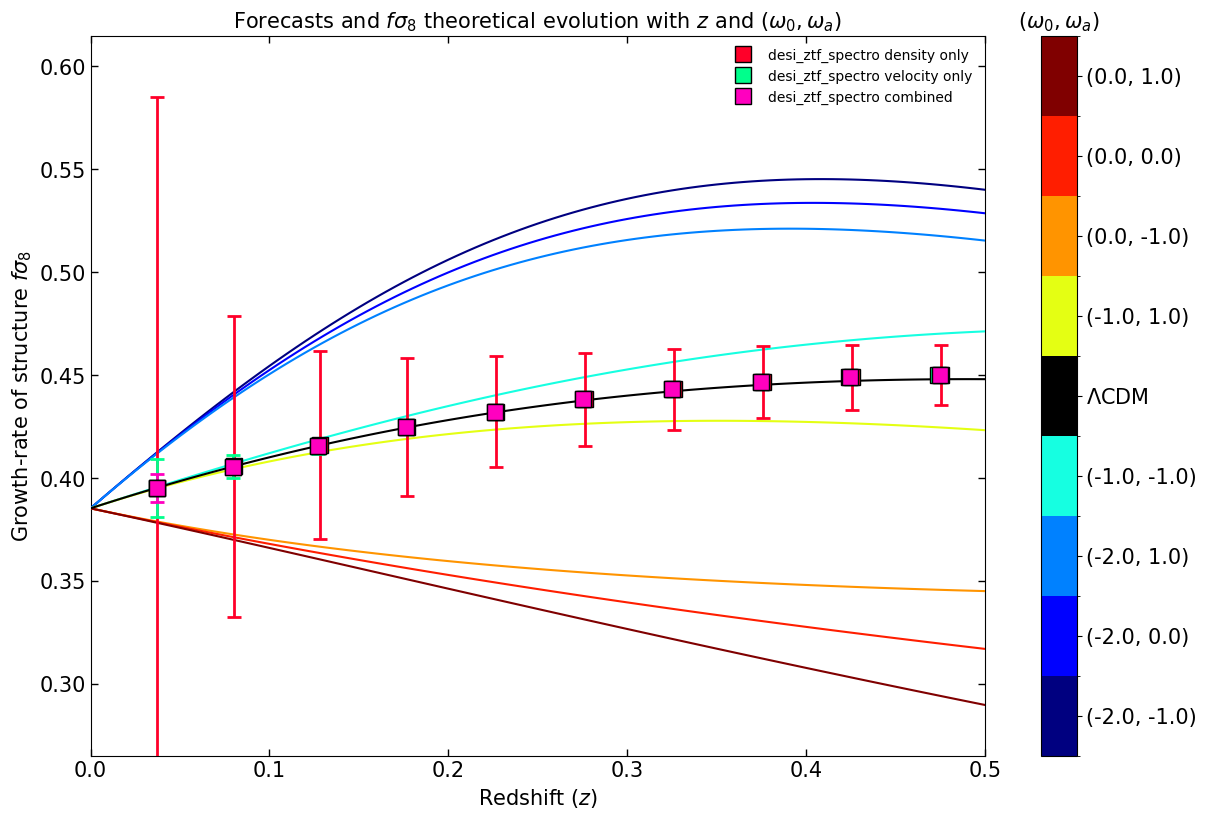

In [10]:
fig_settings_fs8.update([('save', False),
                         ('ylim', [0.265, 0.615])])

plot_params.update([('zrange' , [''] ),       # list of zrange to plot
                    
                      ('dataset', ['desi_ztf_spectro']), 
                    
                      ('ftype'  , ['density only',     # list of ftype to plot
                                   'velocity only',
                                   'combined'   ]),
                      
                      ('plot_mode', 'zrange'),         # plot all ftype of dataset for each zrange
                      ('values'   , 'fs8'),
                      ('ztot'     , False),
                      
                      ('error_bands' , False),
                      ('fig_settings', fig_settings_fs8),
                      ('figname', 'fig_rapport_desi_ztf_photo_ftypes')

                     ])

pt.plot_ffc_values(plot_params)

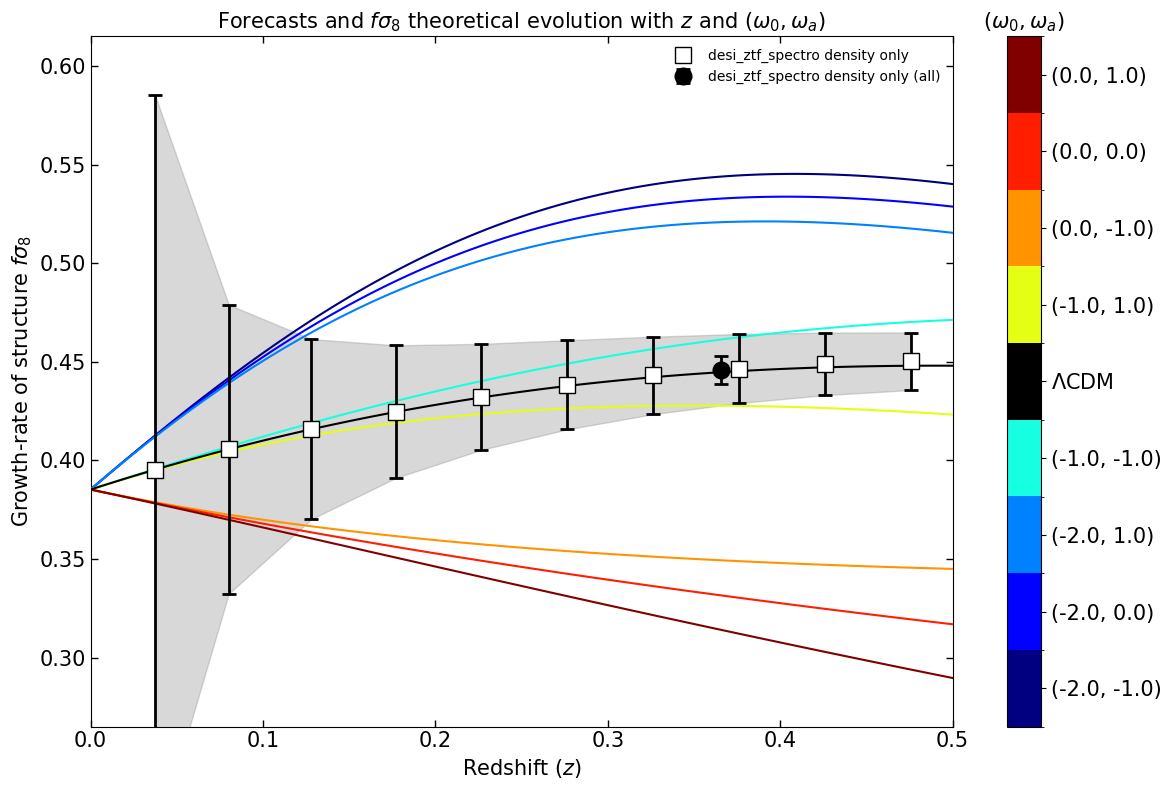

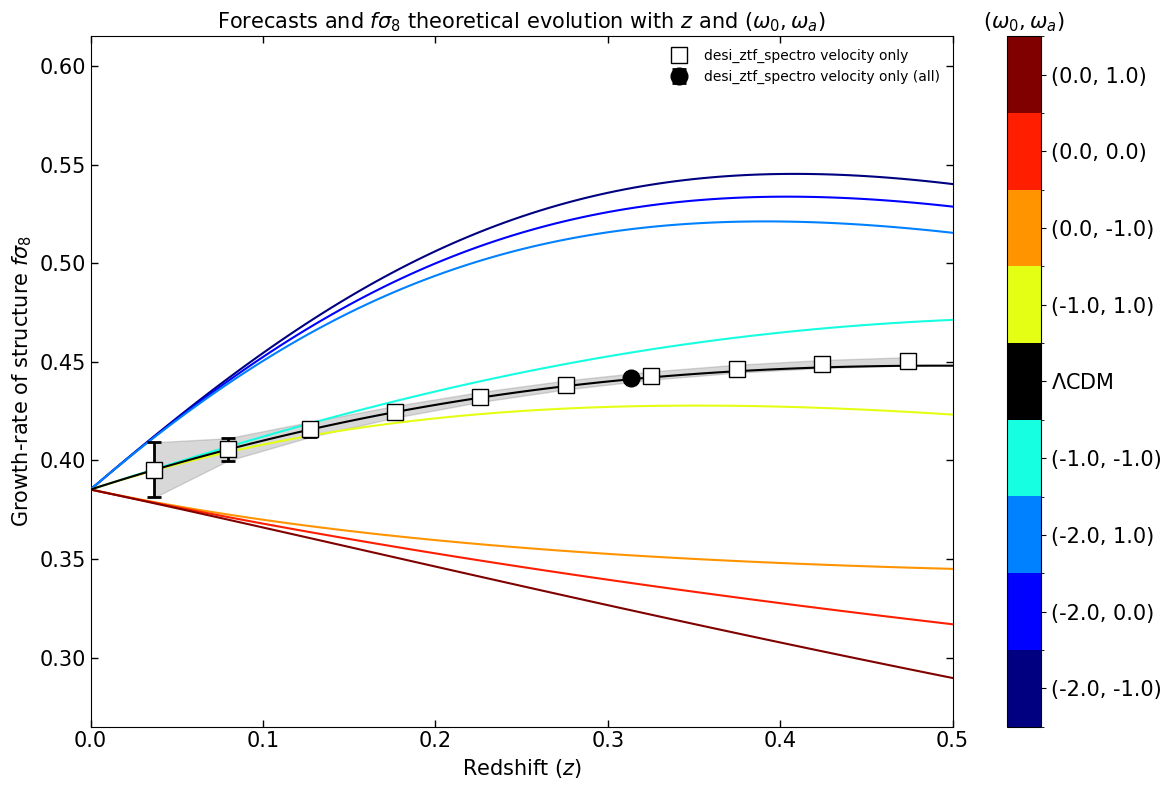

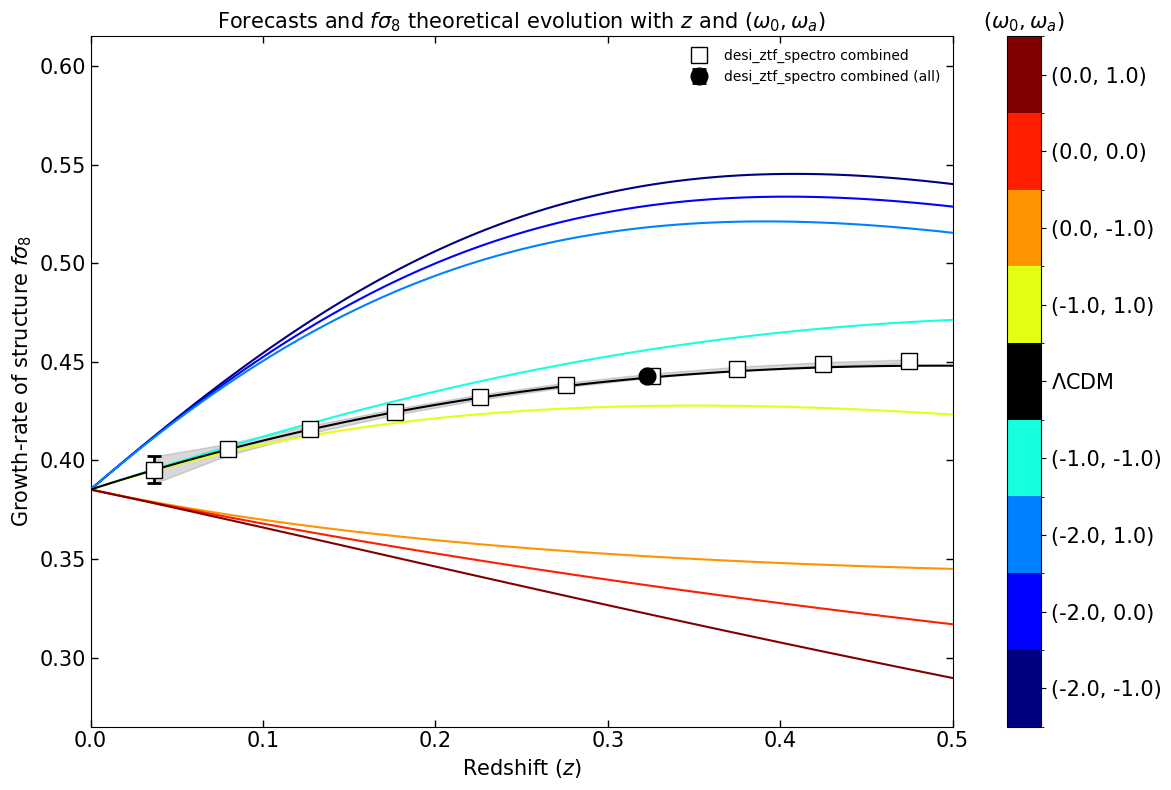

In [12]:
fig_settings_fs8.update([('save', False),
                         ('ylim', [0.265, 0.615])])

plot_params.update([('zrange' , [''] ),       # list of zrange to plot
                    
                      ('dataset', [
                                   'desi_ztf_spectro', # list of dataset to plot
                                   #'desi_ztf_photo',
                                   #'fmost_lsst_photo'
                                  ]), 
                    
                      ('ftype'  , ['density only',     # list of ftype to plot
                                   'velocity only',
                                   'combined'   ]),
                      
                      ('plot_mode', 'ftype'),         # plot all ftype of dataset for each zrange
                      ('values'   , 'fs8'),
                      ('ztot'     , True),
                      
                      ('error_bands' , True),
                      ('fig_settings', fig_settings_fs8),
                      ('figname', 'fig_rapport_desi_ztf_photo_ftypes')

                     ])

pt.plot_ffc_values(plot_params)

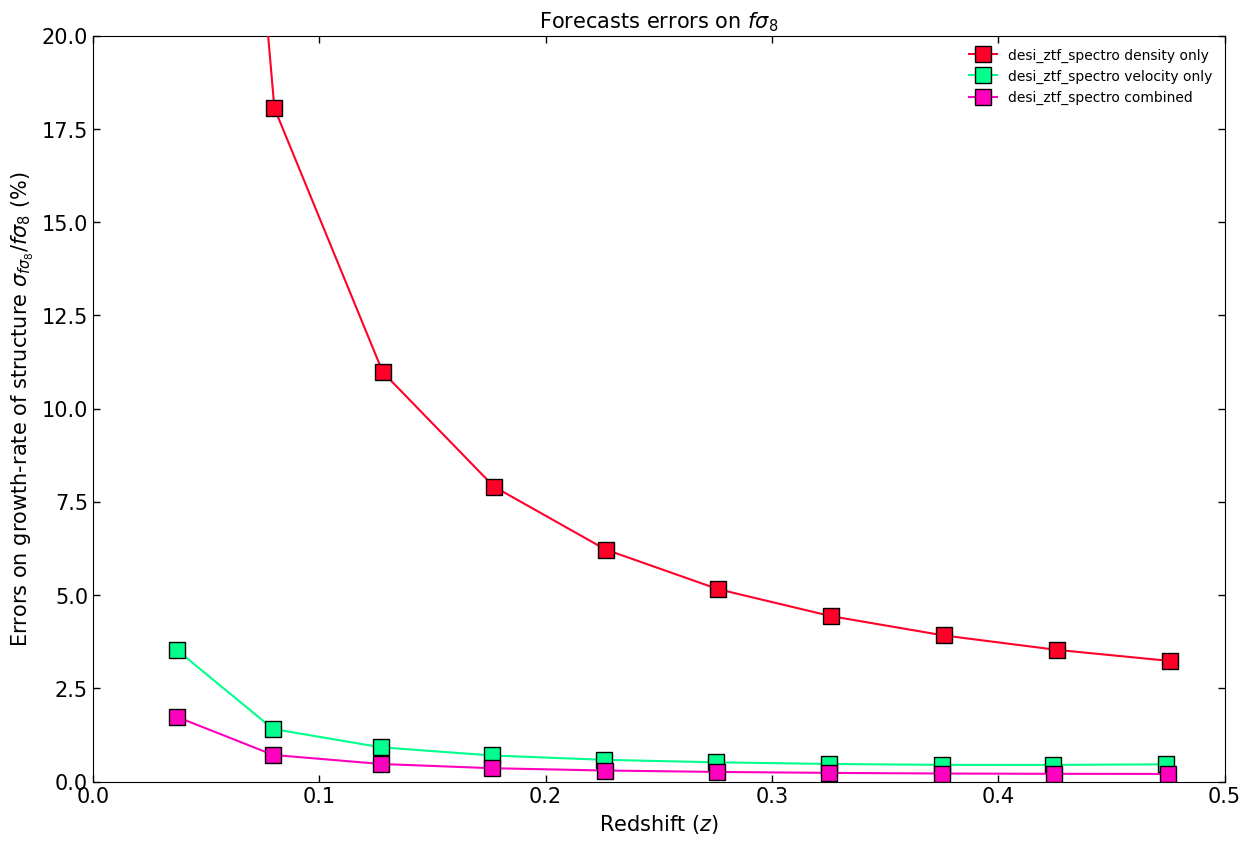

In [14]:
fig_settings_errors.update([('save', False),
                            ('ylim', [0, 20]),
                         ('loc_legend', 1)])

plot_params.update([('zrange' , [''] ),
                      ('dataset', ['desi_ztf_spectro']),
                      ('ftype'  , ['density only',
                                   'velocity only',
                                   'combined']),
                      
                      ('plot_mode', 'zrange'),
                      ('values'   , 'errors'),
                      ('ztot'     , False),
                      
                      ('error_bands' , False),
                      ('fig_settings', fig_settings_errors),
                      ('figname', '')
                     ])

pt.plot_ffc_values(plot_params)